## From scratch

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class KMeans:
    def __init__(self, k, iterations):
        self.K = k
        self.iterations = iterations
        self.centroid = None
        self.delta = 0.001

    @staticmethod
    def cal_distance(data_point, centroid):
        """Calculates the Euclidean distance between the data points and the centroid.
        Returns array with shape (k,) i.e distance from each centroid"""
        return np.sqrt(np.sum((data_point-centroid)**2, axis = 1))

    def fit(self, X):
        """ Finds the best fit centroids to represent the clusters"""
        
        ## Pick random K centroids
        self.centroids = np.random.uniform(np.amin(X, axis = 0), np.amax(X, axis = 0), size = (self.K, X.shape[1]))

        for _ in range(self.iterations):
        ## Calculate the Euclidean distance between the data points and the centroids
            y = []
            for data_point in X:
                distance_arr = KMeans.cal_distance(data_point, self.centroids)
                # Select the cluster with minimum distance between data point and centroid
                cluster_num = np.argmin(distance_arr) 
                y.append(cluster_num)

            y = np.array(y)
            
            cluster_indices = []
            ## Find the datapoints belonging to each of the cluster
            for i in range(self.K):
                cluster_indices.append(np.argwhere(y == i))
    
            cluster_center = []
            ## Update the centroid to the mean of the cluster
            for idx, indices in enumerate(cluster_indices):
                cluster_center.append(np.mean(X[indices], axis= 0)[0])
    
            ## Calculate the delta between the current centroid and earlier centroid to see if there is a need to update centroid
            if np.max(self.centroids - np.array(cluster_center)) < self.delta:
                break
            else:
                ## Update centroid if needed
                self.centroids = cluster_center
        return y
            
        
    
        

In [15]:
kmeans.centroids

[array([76.84375, 67.71875]),
 array([19.92857143, 76.07142857]),
 array([55.5  , 20.225])]

In [18]:
centroids

array(<__main__.KMeans object at 0x13105bad0>, dtype=object)

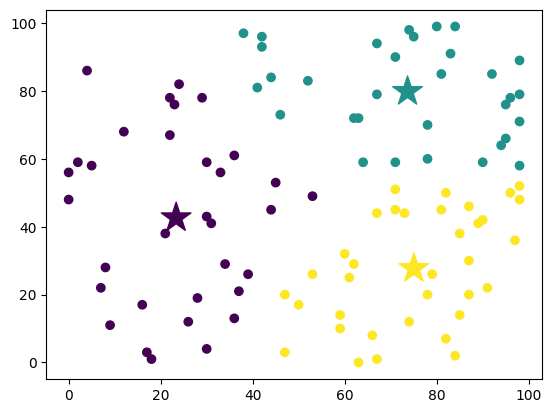

In [20]:
random_points = np.random.randint(0,100,(100,2))
kmeans = KMeans(k = 3, iterations = 200)
labels = kmeans.fit(random_points)
centroids = np.array(kmeans.centroids)

plt.scatter(random_points[:,0], random_points[:,1], c = labels)
plt.scatter(centroids[:,0],centroids[:,1], c = range(len(centroids)), marker = "*", s = 500)
plt.show()

## Using scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [33]:
X,y_true = make_blobs(n_samples = 300, centers = 3, cluster_std = 0.60, random_state = 42)

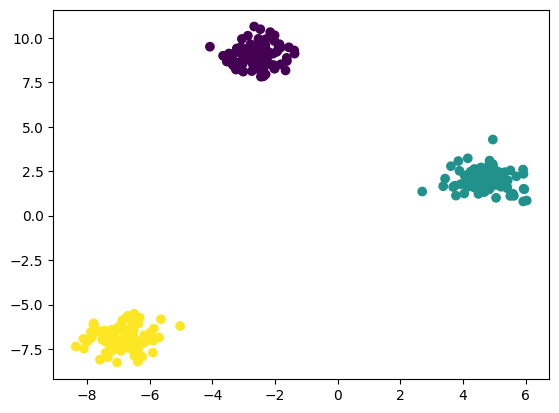

In [34]:
plt.scatter(X[:,0], X[:,1], c = y_true)

In [36]:
inertia = [] #WSS
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [40]:
inertia

[19884.398329041524,
 5335.122314158595,
 204.06943840478868,
 180.4454879696193,
 162.14841974231317,
 141.10675258701315,
 114.94634231642195,
 106.82809749693011,
 93.0044147872068,
 78.3404817398145]

In [38]:
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

(300, 2)

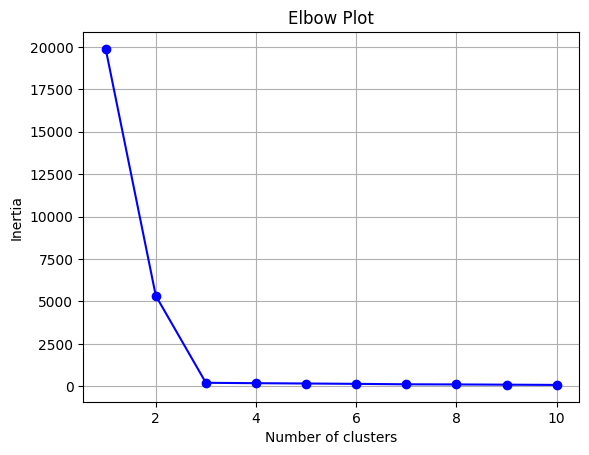

In [43]:
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.grid(True)

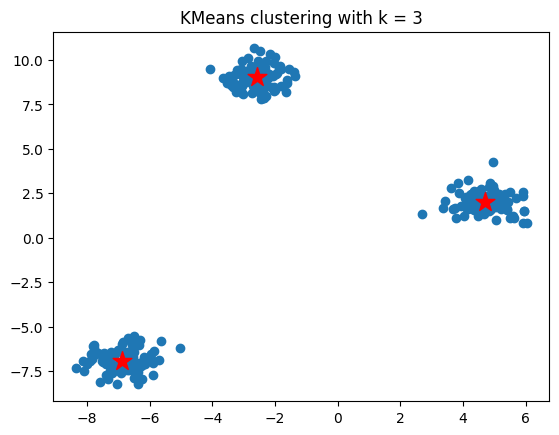

In [49]:
k = 3
kmeans = KMeans(n_clusters = k)
y_labels = kmeans.fit_predict(X)

plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c= 'red', marker = '*', s = 200)
plt.title('KMeans clustering with k = 3')
plt.show()